# 라이브러리

In [1]:
from sklearn.metrics import accuracy_score, f1_score, recall_score, precision_score
from sklearn.metrics import roc_auc_score, precision_recall_curve, confusion_matrix
from statsmodels.stats.outliers_influence import variance_inflation_factor
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.model_selection import train_test_split
from statsmodels.tools.tools import add_constant
from sklearn.preprocessing import RobustScaler
from sklearn.ensemble import IsolationForest
from tensorflow.keras import layers, Model
from imblearn.over_sampling import SMOTE
from scipy.stats import mannwhitneyu
from sklearn.svm import OneClassSVM
from psmpy.functions import cohenD
from psmpy.plotting import *
from psmpy import PsmPy
import matplotlib.pyplot as plt
import tensorflow as tf
import xgboost as xgb
import seaborn as sns
import pandas as pd
import numpy as np

In [ ]:
df = pd.read_csv('../data/train_V2.csv')
df

,Id,groupId,matchId,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,...,revives,rideDistance,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc
0,7f96b2f878858a,4d4b580de459be,a10357fd1a4a91,0,0,0.00,0,0,0,60,...,0,0.0000,0,0.000,0,0,244.80,1,1466,0.4444
1,eef90569b9d03c,684d5656442f9e,aeb375fc57110c,0,0,91.47,0,0,0,57,...,0,0.0045,0,11.040,0,0,1434.00,5,0,0.6400
2,1eaf90ac73de72,6a4a42c3245a74,110163d8bb94ae,1,0,68.00,0,0,0,47,...,0,0.0000,0,0.000,0,0,161.80,2,0,0.7755
3,4616d365dd2853,a930a9c79cd721,f1f1f4ef412d7e,0,0,32.90,0,0,0,75,...,0,0.0000,0,0.000,0,0,202.70,3,0,0.1667
4,315c96c26c9aac,de04010b3458dd,6dc8ff871e21e6,0,0,100.00,0,0,0,45,...,0,0.0000,0,0.000,0,0,49.75,2,0,0.1875
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4446961,afff7f652dbc10,d238e426f50de7,18492834ce5635,0,0,0.00,0,0,0,74,...,0,1292.0000,0,0.000,0,0,1019.00,3,1507,0.1786
4446962,f4197cf374e6c0,408cdb5c46b2ac,ee854b837376d9,0,1,44.15,0,0,0,69,...,0,0.0000,0,0.000,0,0,81.70,6,0,0.2935
4446963,e1948b1295c88a,e26ac84bdf7cef,6d0cd12784f1ab,0,0,59.06,0,0,0,66,...,0,0.0000,0,2.184,0,0,788.70,4,0,0.4815
4446964,cc032cdd73b7ac,c2223f35411394,c9c701d0ad758a,0,4,180.40,1,1,2,11,...,2,0.0000,0,0.000,0,0,2748.00,8,0,0.8000


# 데이터 전처리

### 데이터 요약
|변수|데이터 유형|데이터 설명|
|---|:---|:---|
|assists|int|자신에게 사살되지 못했지만 데미지를 넣은 적의 수|
|boosts|int|도핑 아이템 사용 횟수|
|damageDealt|float|적에게 가한 전체 대미지|
|DBNOs|int|기절시킨 적의 수|
|groupId|object|경기내 식별 ID|
|headshotKills|int|헤드샷으로 죽인 적의 수|
|heals|int|회복 아이템 사용 횟수|
|Id|object|해당 데이터 ID|
|killPlace|int|경기 내 죽인 적의 순위|
|killPoints|int|유저의 레이팅|
|kills|int|경기 내 적을 죽인 수|
|killStreaks|int|짧은 시간 내에 연속으로 적을 죽인 수|
|longestKill|float|사살한 적까지의 거리 최대값|
|matchDuration|int|경기가 진행된 시간 (단위: 초)|
|matchId|object|경기 식별 ID|
|matchType|object|경기 모드(솔로, 듀오, 스쿼드...)|
|numGroups|int|경기 내 참여 그룹 수|
|rankPoints|int|유저의 레이팅|
|revives|int|유저가 팀원을 부활시킨 횟수|
|rideDistance|float|이동수단을 통해 이동한 거리(단위: m)|
|roadKills|int|이동수단으로 살해한 적의 수|
|swimDistance|float|수영으로 이동한 거리(단위: m)|
|teamKills|int|같은 팀원을 살해한 수|
|vehicleDestroys|int|파괴한 이동수단의 수|
|walkDistance|float|걸어서 이동한 거리(단위: m)|
|weaponsAcquired|int|획득한 무기의 수|
|winPoints|int|유저의 ELO레이팅(승리 횟수 기반)|
|winPlacePerc|float|현재 경기에서의 백분위 기반 유저의 순위(종속변수)|

In [ ]:
df.dtypes

Id                  object
groupId             object
matchId             object
assists              int64
boosts               int64
damageDealt        float64
DBNOs                int64
headshotKills        int64
heals                int64
killPlace            int64
killPoints           int64
kills                int64
killStreaks          int64
longestKill        float64
matchDuration        int64
matchType           object
maxPlace             int64
numGroups            int64
rankPoints           int64
revives              int64
rideDistance       float64
roadKills            int64
swimDistance       float64
teamKills            int64
vehicleDestroys      int64
walkDistance       float64
weaponsAcquired      int64
winPoints            int64
winPlacePerc       float64
dtype: object

In [4]:
# 불필요한 컬럼 제거
df.drop(columns={'matchId', 'numGroups', 'maxPlace', 'killPlace', 'matchDuration',
                 'vehicleDestroys', 'killPoints', 'winPoints'}, inplace=True)
df.head()

,Id,groupId,assists,boosts,damageDealt,DBNOs,headshotKills,heals,kills,killStreaks,...,matchType,rankPoints,revives,rideDistance,roadKills,swimDistance,teamKills,walkDistance,weaponsAcquired,winPlacePerc
0,7f96b2f878858a,4d4b580de459be,0,0,0.00,0,0,0,0,0,...,squad-fpp,-1,0,0.0000,0,0.00,0,244.80,1,0.4444
1,eef90569b9d03c,684d5656442f9e,0,0,91.47,0,0,0,0,0,...,squad-fpp,1484,0,0.0045,0,11.04,0,1434.00,5,0.6400
2,1eaf90ac73de72,6a4a42c3245a74,1,0,68.00,0,0,0,0,0,...,duo,1491,0,0.0000,0,0.00,0,161.80,2,0.7755
3,4616d365dd2853,a930a9c79cd721,0,0,32.90,0,0,0,0,0,...,squad-fpp,1408,0,0.0000,0,0.00,0,202.70,3,0.1667
4,315c96c26c9aac,de04010b3458dd,0,0,100.00,0,0,0,1,1,...,solo-fpp,1560,0,0.0000,0,0.00,0,49.75,2,0.1875


In [5]:
# 위 'rankPoints' 값에 -1을 조회
rank = df[df['rankPoints'] == -1]
len(rank)

1701810

In [6]:
# rankPoints의 -1을 제거하기엔 데이터 손실이 크기에 0으로 대체
df['rankPoints'] = df['rankPoints'].replace(-1, 0)
df.isna().sum() # 결측치 확인

,0
Id,0
groupId,0
assists,0
boosts,0
damageDealt,0
DBNOs,0
headshotKills,0
heals,0
kills,0
killStreaks,0


In [7]:
# 파생변수 생성
df['total_distance'] = df['walkDistance'] + df['rideDistance'] + df['swimDistance'] # 총 이동거리
df['headshot_Rate'] = df['headshotKills'] / df['kills'].replace(0, np.inf) # 킬 수 대비 헤드샷 비율 계산
df['kills_per_distance'] = df['total_distance'] / df['kills'].replace(0, np.inf) # 킬 수 대비 이동거리

df = df.dropna(subset=['winPlacePerc']) # 결측치 제거
df.head()

,Id,groupId,assists,boosts,damageDealt,DBNOs,headshotKills,heals,kills,killStreaks,...,rideDistance,roadKills,swimDistance,teamKills,walkDistance,weaponsAcquired,winPlacePerc,total_distance,headshot_Rate,kills_per_distance
0,7f96b2f878858a,4d4b580de459be,0,0,0.00,0,0,0,0,0,...,0.0000,0,0.00,0,244.80,1,0.4444,244.8000,0.0,0.00
1,eef90569b9d03c,684d5656442f9e,0,0,91.47,0,0,0,0,0,...,0.0045,0,11.04,0,1434.00,5,0.6400,1445.0445,0.0,0.00
2,1eaf90ac73de72,6a4a42c3245a74,1,0,68.00,0,0,0,0,0,...,0.0000,0,0.00,0,161.80,2,0.7755,161.8000,0.0,0.00
3,4616d365dd2853,a930a9c79cd721,0,0,32.90,0,0,0,0,0,...,0.0000,0,0.00,0,202.70,3,0.1667,202.7000,0.0,0.00
4,315c96c26c9aac,de04010b3458dd,0,0,100.00,0,0,0,1,1,...,0.0000,0,0.00,0,49.75,2,0.1875,49.7500,0.0,49.75


# EDA
- 전체 분포 파악
- 핵 사용자는 당연히 승리했을거라 판단
- 그래서 승리, 패배 유저로 분리 후 두 그룹 패턴 분석

In [ ]:
df.head()

,Id,groupId,assists,boosts,damageDealt,DBNOs,headshotKills,heals,kills,killStreaks,...,rideDistance,roadKills,swimDistance,teamKills,walkDistance,weaponsAcquired,winPlacePerc,total_distance,headshot_Rate,kills_per_distance
0,7f96b2f878858a,4d4b580de459be,0,0,0.00,0,0,0,0,0,...,0.0000,0,0.00,0,244.80,1,0.4444,244.8000,0.0,0.00
1,eef90569b9d03c,684d5656442f9e,0,0,91.47,0,0,0,0,0,...,0.0045,0,11.04,0,1434.00,5,0.6400,1445.0445,0.0,0.00
2,1eaf90ac73de72,6a4a42c3245a74,1,0,68.00,0,0,0,0,0,...,0.0000,0,0.00,0,161.80,2,0.7755,161.8000,0.0,0.00
3,4616d365dd2853,a930a9c79cd721,0,0,32.90,0,0,0,0,0,...,0.0000,0,0.00,0,202.70,3,0.1667,202.7000,0.0,0.00
4,315c96c26c9aac,de04010b3458dd,0,0,100.00,0,0,0,1,1,...,0.0000,0,0.00,0,49.75,2,0.1875,49.7500,0.0,49.75


### 전체 분포 파악

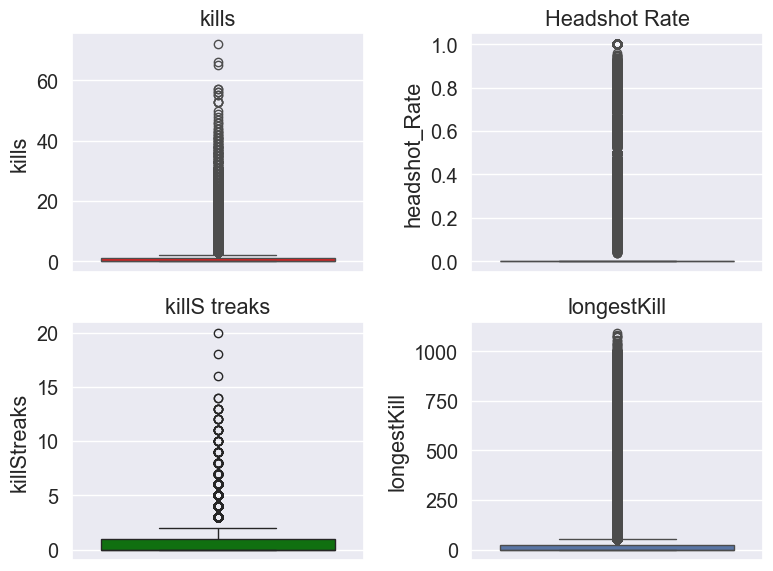

In [ ]:
fig, axes = plt.subplots(2, 2, figsize=(8, 6))

sns.boxplot(ax=axes[0, 0], y=df['kills'], color='red') # 킬
axes[0, 0].set_title('kills')
sns.boxplot(ax=axes[0, 1], y=df['headshot_Rate'], color='orange') # 킬 수 대비 헤드샷 비율
axes[0, 1].set_title('Headshot Rate')
sns.boxplot(ax=axes[1, 0], y=df['killStreaks'], color='green') # 연속으로 킬 처치
axes[1, 0].set_title('killS treaks')
sns.boxplot(ax=axes[1, 1], y=df['longestKill']) # 가장 먼 거리에서 킬(킬을 하고 이동을 많이 할 경우 값이 높게 나올 수 있음
axes[1, 1].set_title('longestKill')             # (예: 킬 후 차량, 자전거 탑승을 해서 값이 높게 나올 수도 있다.)
plt.tight_layout()
plt.show()

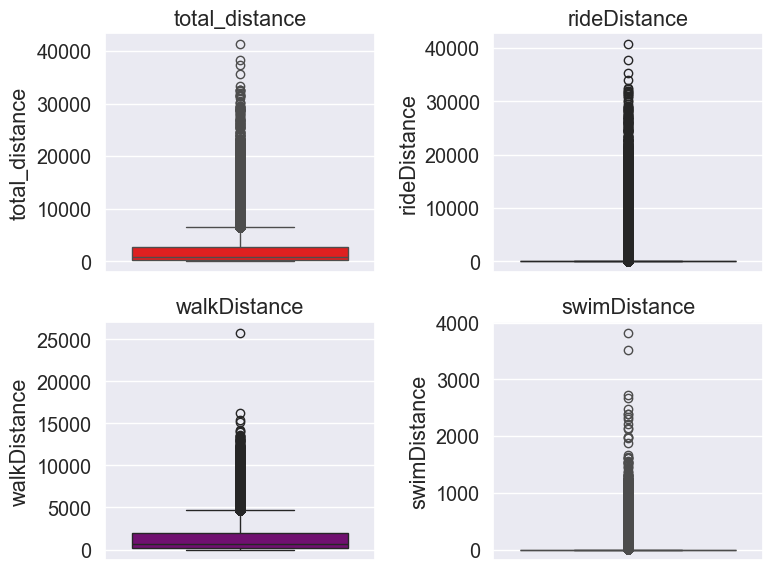

In [ ]:
fig, axes = plt.subplots(2, 2, figsize=(8, 6))

sns.boxplot(ax=axes[0, 0], y=df['total_distance'], color='red') # 총 이동거리
axes[0, 0].set_title('total_distance')
sns.boxplot(ax=axes[0, 1], y=df['rideDistance'], color='green') # 자전거 이동거리
axes[0, 1].set_title('rideDistance')
sns.boxplot(ax=axes[1, 0], y=df['walkDistance'], color='purple') # 걸어서 이동거리
axes[1, 0].set_title('walkDistance')
sns.boxplot(ax=axes[1, 1], y=df['swimDistance']) # 수영 이동거리
axes[1, 1].set_title('swimDistance')

plt.tight_layout()
plt.show()

### 승리 점수 확인
- 승리 점수가 높을 수록 핵 사용자와 관계가 있을거 같기에 전체적인 분포 확인
- 게임 특성상 초기에 많이 죽거나 끝까지 생존에 승리하는 모습을 보여준다.

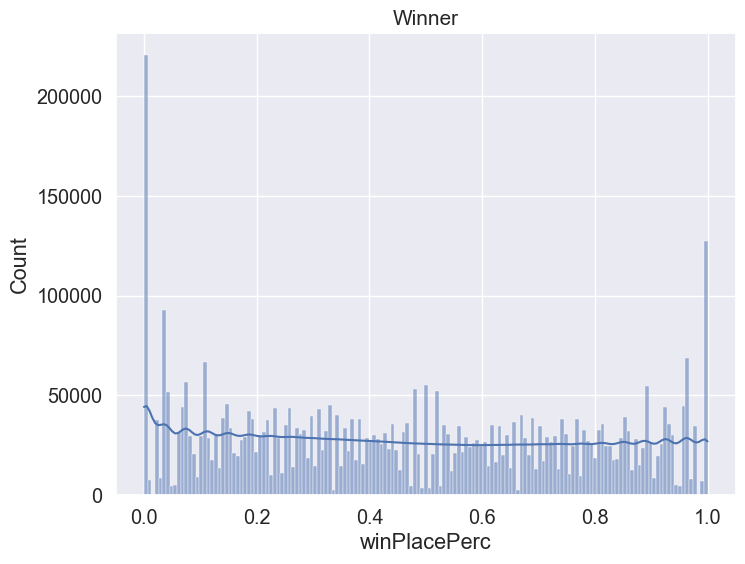

승리 예측 평균 점수: 0.47


In [ ]:
plt.figure(figsize=(8, 6))
sns.histplot(df['winPlacePerc'], kde=True)
plt.title('Winner', fontsize=15)
plt.show()

print(f"승리 예측 평균 점수: {df['winPlacePerc'].mean():.2f}")

### 승리 유저 VS 패배 유저 비교
- 승리 유저 : "winPlacePerc" 값이 1인 유저
- 패배 유저 : "winPlacePerc" 값이 1이 아닌 유저
- 두 그룹간 패턴 파악

In [ ]:
winner = df[df['winPlacePerc'] == 1]
loser = df[df['winPlacePerc'] != 1]

print(f"전체 유저: {len(df)}")
print(f"패배 유저 비율: {(len(loser) / len(df)) * 100:.2f}%")
print(f"승리 유저 비율: {(len(winner) / len(df)) * 100:.2f}%")

전체 유저: 4446965
패배 유저 비율: 97.13%
승리 유저 비율: 2.87%


In [ ]:
# 그룹별 boxplot 및 평균 함수
def grid_boxplot(winner, loser, col):

    fig, axes = plt.subplots(1, 2, figsize=(8, 6))

    sns.boxplot(ax=axes[0], y=winner[col])
    axes[0].set_title('Winner', fontsize=15)
    sns.boxplot(ax=axes[1], y=loser[col], color='orange')
    axes[1].set_title('Loser', fontsize=15)
    plt.tight_layout()
    plt.show()

    print(f"승리유저 평균 {col}: {winner[col].mean():.2f}")
    print(f"패배유저 평균 {col}: {loser[col].mean():.2f}")

#### 킬수 비교

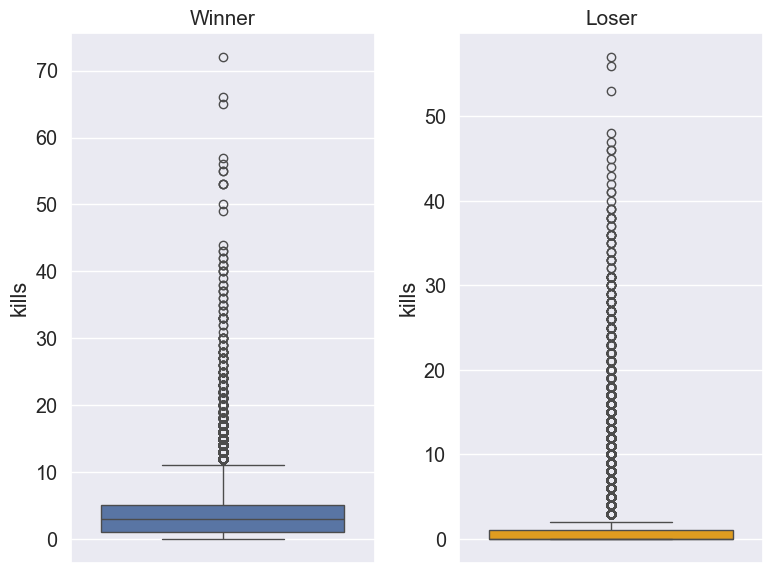

승리유저 평균 kills: 3.63
패배유저 평균 kills: 0.84


In [ ]:
grid_boxplot(winner, loser, 'kills')

#### 헤드샷 비율 비교

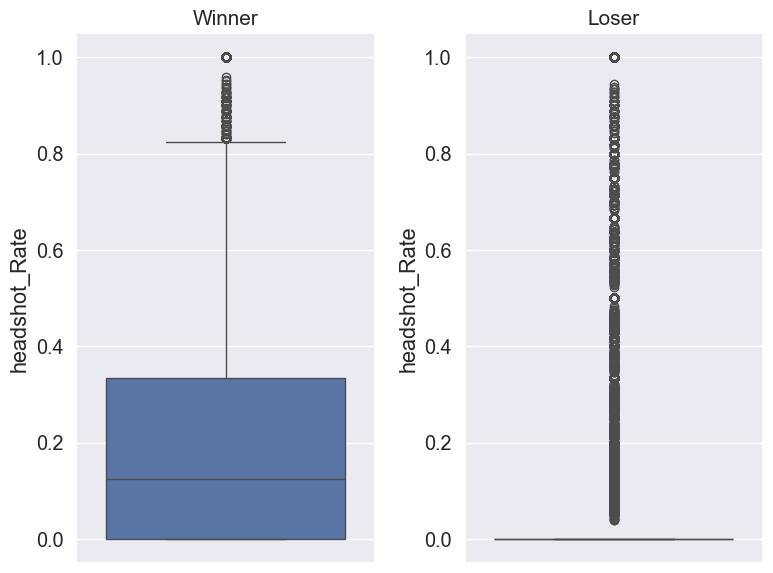

승리유저 평균 headshot_Rate: 0.22
패배유저 평균 headshot_Rate: 0.10


In [ ]:
grid_boxplot(winner, loser, 'headshot_Rate')

#### 어시스트 비교

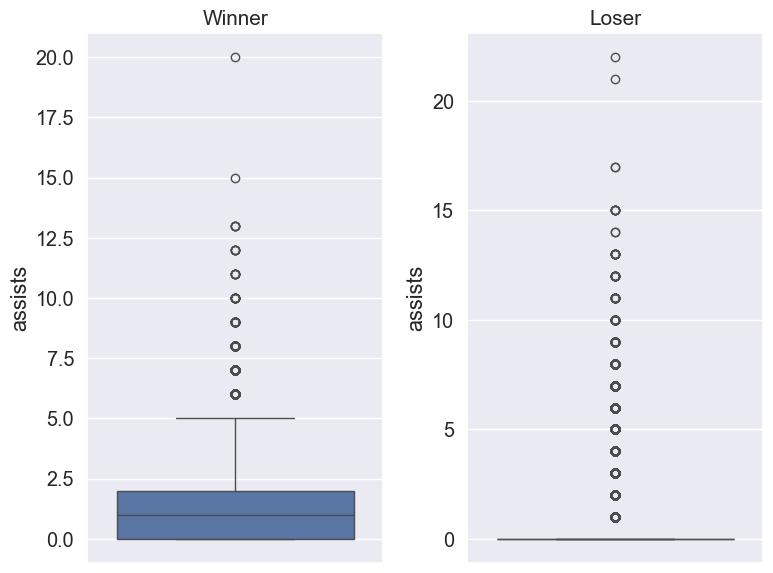

승리유저 평균 assists: 1.10
패배유저 평균 assists: 0.21


In [ ]:
grid_boxplot(winner, loser, 'assists')

#### 총 이동거리 비교

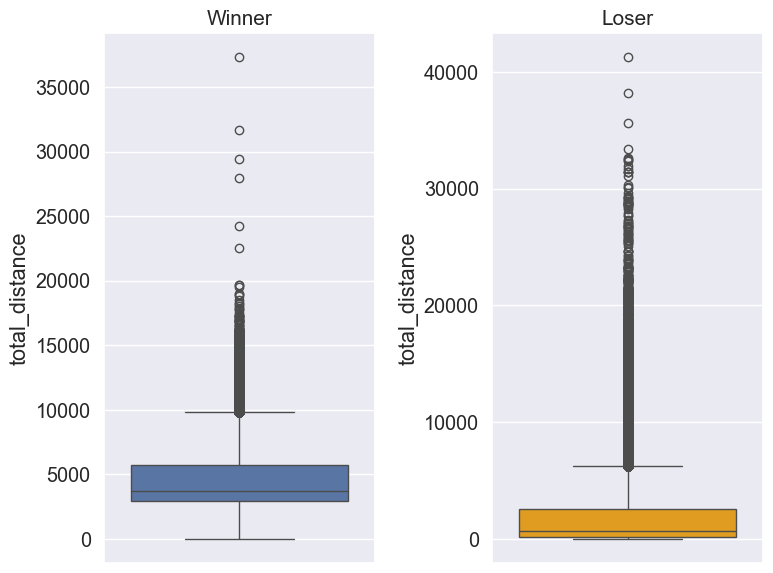

승리유저 평균 total_distance: 4455.76
패배유저 평균 total_distance: 1685.37


In [ ]:
grid_boxplot(winner, loser, 'total_distance')

#### 무기 획득 비교

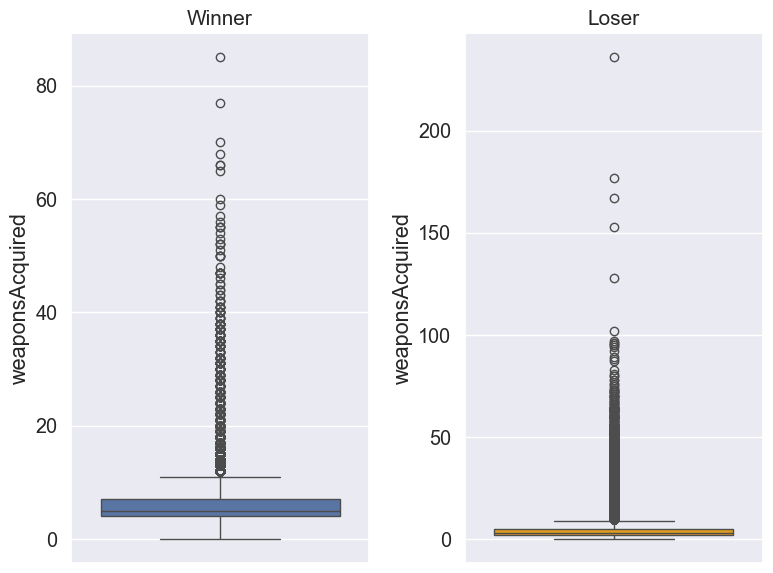

승리유저 평균 weaponsAcquired: 5.68
패배유저 평균 weaponsAcquired: 3.60


In [ ]:
grid_boxplot(winner, loser, 'weaponsAcquired')

### EDA 요약
- 승리 유저는 킬, 헤드샷비율, 어시스트, 총 이동거리, 무기 획득 수 등에서 패배유저보다 높은 수치를 보여준다.
- 따라서 승리 유저 안에 핵 유저가 있을거라 판단된다.

--------------------------------------

# 유저 분리
- 현재 이상치 라벨이 없기에 모델을 활용하여 핵/일반 유저 분리
- 위 EDA 결과 핵 사용자는 승리한 유저 패턴과 비슷하다고 추정
- 또한 핵을 사용하면 승리 가능성이 높아지기에 상관관계가 있다고 판단
- 최초에는 승리 예측값이 1인 유저들만을 대상으로 분석을 고려했으나, 이는 전체 데이터의 약 3%에 불과하여 심각한 데이터 손실을 초래
- 그래서 승리 예측값의 3분위수인 0.74 이상을 기준으로 범위 조정

In [8]:
pd.set_option('display.float_format', '{:,.2f}'.format)
df['winPlacePerc'].describe()

,winPlacePerc
count,"4,446,965.00"
mean,0.47
std,0.31
min,0.00
25%,0.20
50%,0.46
75%,0.74
max,1.00


In [9]:
win = df[df['winPlacePerc'] >= 0.74]
print(f"전체 데이터 수: {len(df)}")
print(f"전처리 후 데이터 수: {len(win)}")
print('-' * 30)
print(f"제외한 데이터 비율: {(len(df) - len(win)) / len(df) * 100:.2f}%")
print(f"최종 데이터 비율: {len(win) / len(df) * 100:.2f}")

pd.set_option('display.float_format', '{:,.2f}'.format)

전체 데이터 수: 4446965
전처리 후 데이터 수: 1128703
------------------------------
제외한 데이터 비율: 74.62%
최종 데이터 비율: 25.38


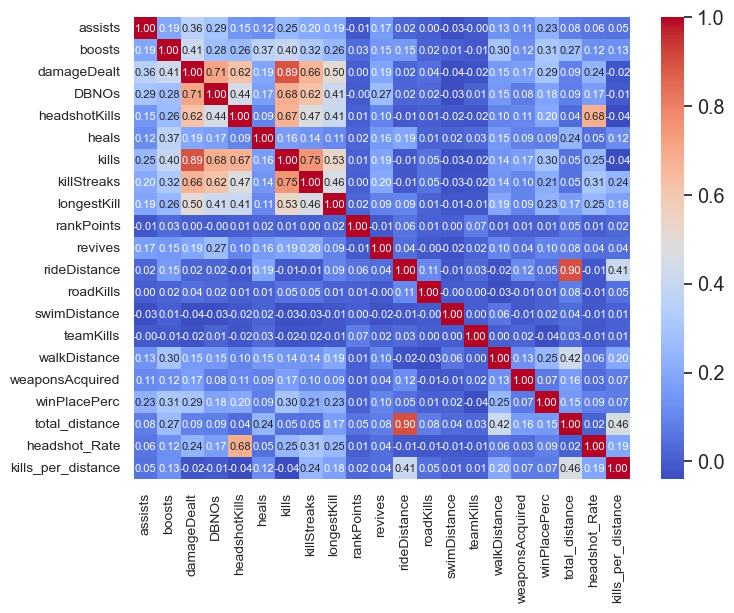

In [ ]:
plt.figure(figsize=(8, 6))
sns.heatmap(win.select_dtypes(include=['number']).corr(), annot=True, fmt='.2f', cmap='coolwarm', annot_kws={"size": 8})
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.show()

### 비지도 학습
- Isolation Forest - ML
- AutoEncoder - DL
- 두 모델을 활용해 이상치로 판별된 데이터 간 교집합에 해당하는 유저를 핵 유저로 정의

In [10]:
def group_rate(hack_user, normal_user, col):
    """모델 score 간접적인 평가"""
    hack_mean = np.mean(hack_user[col])  # 핵 유저의 평균
    hack_std = np.std(hack_user[col])  # 핵 유저의 표준편차
    normal_mean = np.mean(normal_user[col])  # 정상 유저의 평균
    normal_std = np.std(normal_user[col])  # 정상 유저의 표준편차

    print(f"Normal_User {col} 평균: {normal_mean:.4f} 표준편차: ({normal_std:.4f})")
    print(f"Hack_User {col} 평균: {hack_mean:.4f} 표준편차: ({hack_std:.4f})")

### IsolationForest

In [11]:
scaler = RobustScaler()
feature = scaler.fit_transform(win.drop(columns={'Id', 'groupId', 'matchType', 'rideDistance'})).copy() # rideDistance: 상관관계 9.0

# Isolation Forest 모델
iso_forest = IsolationForest(n_estimators=300, contamination=0.007, max_samples=0.3, random_state=42, n_jobs=-1)
iso_forest.fit(feature)

# 예측 및 이상치 점수 계산
win['iso_label'] = iso_forest.predict(feature)  # -1: 이상치, 1: 정상치
win['iso_score'] = iso_forest.decision_function(feature)  # 이상치 점수

iso_hack_user = win[win['iso_label'] == -1]
iso_normal_user = win[win['iso_label'] == 1]

<ipython-input-11-67bd79283204>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  win['iso_label'] = iso_forest.predict(feature)  # -1: 이상치, 1: 정상치
<ipython-input-11-67bd79283204>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  win['iso_score'] = iso_forest.decision_function(feature)  # 이상치 점수


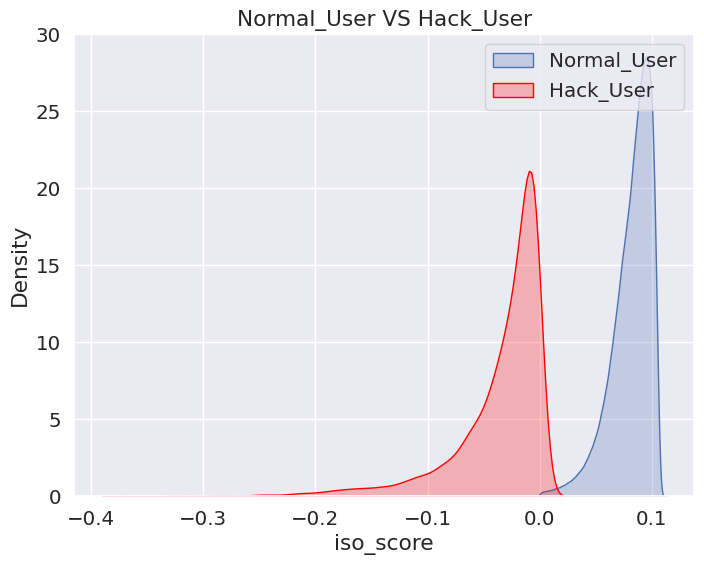

Normal_User iso_score 평균: 0.0814 표준편차: (0.0179)
Hack_User iso_score 평균: -0.0362 표준편차: (0.0428)


In [12]:
# KDE 시각화
plt.figure(figsize=(8, 6))
sns.kdeplot(iso_normal_user['iso_score'], label='Normal_User', fill=True)
sns.kdeplot(iso_hack_user['iso_score'], label='Hack_User', fill=True, color='red')
plt.title('Normal_User VS Hack_User')
plt.legend()
plt.show()

group_rate(iso_hack_user, iso_normal_user, 'iso_score')

### AutoEncoder


In [13]:
input_shape = win.select_dtypes(include=['number']).drop(columns={'iso_label', 'iso_score', 'rideDistance'})
print(f"Input shape: {len((input_shape.columns))}")
print(f"Data Length: {len(win)}")

Input shape: 20
Data Length: 1128703


In [14]:
class Autoencoder(Model):
    def __init__(self):
        super(Autoencoder, self).__init__()
        self.encoder = tf.keras.Sequential([
            layers.Dense(128, activation="relu", input_shape=(20,)),  # 더 넓은 레이어
            layers.Dense(64, activation="relu"),
            layers.Dropout(0.2),
            layers.Dense(32, activation="relu"),
            layers.Dense(16, activation="relu"),
            layers.Dense(8, activation="relu"),])

        self.decoder = tf.keras.Sequential([
            layers.Dense(16, activation="relu"),
            layers.Dense(32, activation="relu"),
             layers.Dropout(0.2),
            layers.Dense(64, activation="relu"),
            layers.Dense(128, activation="relu"),
            layers.Dense(20, activation="linear")])  # 최종 출력을 linear로 변경

    def call(self, inputs):
        encoded = self.encoder(inputs)
        decoded = self.decoder(encoded)
        return decoded

# 손실함수 RMSE
def RMSE(y_true, y_pred):
    return tf.sqrt(tf.reduce_mean(tf.square(y_true - y_pred))) # MAE가 제공하는 안정성과 MSE의 민감성을 동시에 활용

auto_encoder = Autoencoder()
auto_encoder.compile(optimizer='adam', loss=RMSE)

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [15]:
data = win.select_dtypes(include=['number']).drop(columns={'iso_label', 'iso_score', 'rideDistance'})

scaler = RobustScaler()
feature = scaler.fit_transform(data)

early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True) # 5번의 에포크 동안 개선되지 않으면 학습 중지
history = auto_encoder.fit(feature, feature, epochs=60, batch_size=256, callbacks=[early_stopping])

Epoch 1/60
4409/4409 ━━━━━━━━━━━━━━━━━━━━ 30s 6ms/step - loss: 0.8637
Epoch 2/60


/usr/local/lib/python3.10/dist-packages/keras/src/callbacks/early_stopping.py:155: UserWarning: Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss
  current = self.get_monitor_value(logs)


4409/4409 ━━━━━━━━━━━━━━━━━━━━ 43s 7ms/step - loss: 0.3546
Epoch 3/60
4409/4409 ━━━━━━━━━━━━━━━━━━━━ 39s 6ms/step - loss: 0.3303
Epoch 4/60
4409/4409 ━━━━━━━━━━━━━━━━━━━━ 24s 5ms/step - loss: 0.3162
Epoch 5/60
4409/4409 ━━━━━━━━━━━━━━━━━━━━ 40s 5ms/step - loss: 0.3122
Epoch 6/60
4409/4409 ━━━━━━━━━━━━━━━━━━━━ 46s 6ms/step - loss: 0.2909
Epoch 7/60
4409/4409 ━━━━━━━━━━━━━━━━━━━━ 38s 6ms/step - loss: 0.2846
Epoch 8/60
4409/4409 ━━━━━━━━━━━━━━━━━━━━ 41s 6ms/step - loss: 0.2770
Epoch 9/60
4409/4409 ━━━━━━━━━━━━━━━━━━━━ 41s 6ms/step - loss: 0.2671
Epoch 10/60
4409/4409 ━━━━━━━━━━━━━━━━━━━━ 42s 6ms/step - loss: 0.2649
Epoch 11/60
4409/4409 ━━━━━━━━━━━━━━━━━━━━ 38s 5ms/step - loss: 0.2667
Epoch 12/60
4409/4409 ━━━━━━━━━━━━━━━━━━━━ 27s 6ms/step - loss: 0.2587
Epoch 13/60
4409/4409 ━━━━━━━━━━━━━━━━━━━━ 40s 6ms/step - loss: 0.2608
Epoch 14/60
4409/4409 ━━━━━━━━━━━━━━━━━━━━ 41s 6ms/step - loss: 0.2560
Epoch 15/60
4409/4409 ━━━━━━━━━━━━━━━━━━━━ 43s 6ms/step - loss: 0.2534
Epoch 16/60
4409/4409 ━━━

In [16]:
# 재구성 오류: 이상탐지
reconstructions = auto_encoder.predict(feature)
reconstruction_error = np.sqrt(np.mean(np.square(feature - reconstructions), axis=1)) # RMSE

win['auto_score'] = reconstruction_error
win['auto_score'].describe()

35272/35272 ━━━━━━━━━━━━━━━━━━━━ 63s 2ms/step


<ipython-input-16-9b5f0afc0c92>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  win['auto_score'] = reconstruction_error


,auto_score
count,"1,128,703.00"
mean,0.16
std,0.12
min,0.01
25%,0.07
50%,0.14
75%,0.23
max,3.83


임계값 (Threshold): 0.5269


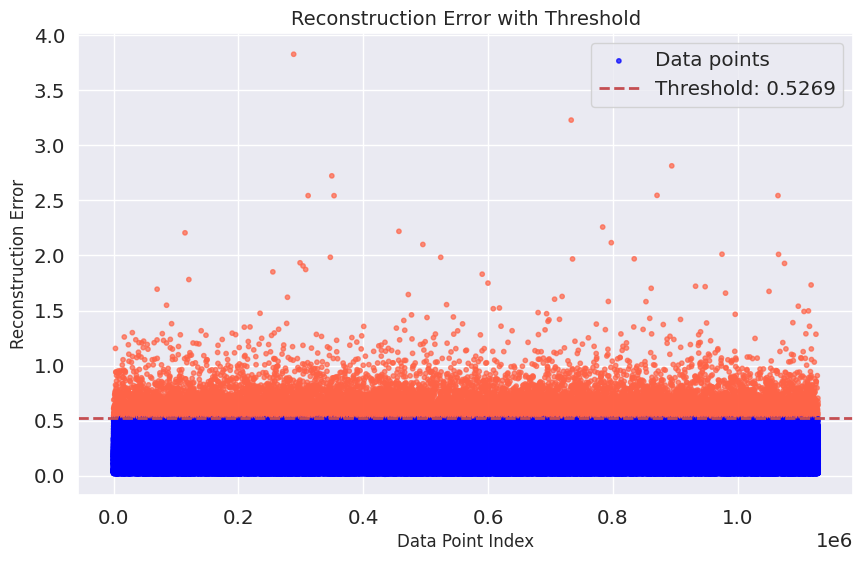

In [ ]:
# 임계값 설정 (평균 + 3 * 표준편차로 설정)
threshold = win['auto_score'].mean() + 3 * win['auto_score'].std()
print(f"임계값 (Threshold): {threshold:.4f}")

colors = ['tomato' if score > threshold else 'blue' for score in win['auto_score']]

# Scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(range(len(win)), win['auto_score'], c=colors, alpha=0.7, s=10, label='Data points')
plt.axhline(y=threshold, color='r', linestyle='--', linewidth=2, label=f'Threshold: {threshold:.4f}')
plt.title("Reconstruction Error with Threshold", fontsize=14)
plt.xlabel("Data Point Index", fontsize=12)
plt.ylabel("Reconstruction Error", fontsize=12)
plt.legend()
plt.show()

<ipython-input-18-2e7659568ee1>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  win['auto_label'] = np.where(win['auto_score'] > threshold, -1, 1)


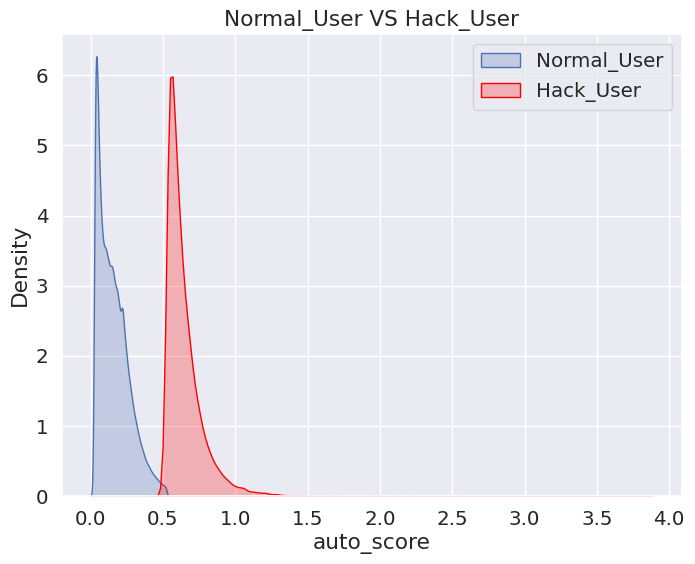

핵 유저: 1.37%
노말 유저: 98.63%


In [18]:
# 핵 유저와 노말 유저 분리
win['auto_label'] = np.where(win['auto_score'] > threshold, -1, 1)

# 분리된 데이터 확인
auto_hack_user = win[win['auto_label'] == -1]  # 핵 유저
auto_normal_user = win[win['auto_label'] == 1]  # 노말 유저
auto_hack_rate = len(auto_hack_user) / len(win) * 100
auto_normal_rate = len(auto_normal_user) / len(win) * 100

# KDE 시각화
plt.figure(figsize=(8, 6))
sns.kdeplot(auto_normal_user['auto_score'], label='Normal_User', fill=True)
sns.kdeplot(auto_hack_user['auto_score'], label='Hack_User', fill=True, color='red')
plt.title('Normal_User VS Hack_User')
plt.legend()
plt.show()

print(f"핵 유저: {auto_hack_rate:.2f}%")
print(f"노말 유저: {auto_normal_rate:.2f}%")

#### 두 모델의 교집합

In [19]:
final_df = win.copy()
final_df['True_label'] = 0

final_df.loc[(final_df['iso_label'] == -1) & (final_df['auto_label'] == -1), 'True_label'] = 1  # True_label : 이진 분류를 위해 0과 1로 설정 / 1 = 핵 유저
final_df = final_df.drop(columns={'iso_score', 'iso_label', 'auto_score', 'auto_label'})

hack_user = final_df[final_df['True_label'] == 1]
normal_user = final_df[final_df['True_label'] == 0]
hack_ratio = len(hack_user) / len(final_df) * 100
normal_ratio = len(normal_user) / len(final_df) * 100

print(f"일반 사용자 수: {len(normal_user)}명")
print(f"핵 사용자 수: {len(hack_user)}명")
print('-' * 50)
print(f"일반 사용자 비율: {normal_ratio:.2f}%")
print(f"핵 사용자 비율: {hack_ratio:.2f}%")

일반 사용자 수: 1125652명
핵 사용자 수: 3051명
--------------------------------------------------
일반 사용자 비율: 99.73%
핵 사용자 비율: 0.27%


------------------------------------------------------------------------------

# 라벨 검증 및 분석
- 라벨의 신빙성을 위해 핵/일반 유저의 통계적 검정

### 가설 설정
- 가설1 : 핵 사용자들은 일반 사용자랑 다르게 헤드샷 비율이 높을 것이다.(정확한 에임 핵을 사용)
- 가설2 : 핵 사용자들은 일반 사용자보다 무기 획득 수가 높다.(스피드 핵, 월핵 등 사용)
- 가설3 : 핵 사용자들은 일반 사용자들보다 힐 아이템 사용이 적을 것이다.(자동회복 핵을 사용하기에)

### 가설 검정
- VIF
- Propensity Score Matching (PSM)
- mannwhitneyu U-검정

#### VIF
- PSM 전 회귀분석을 위해 다중공선성 확인
- VIF(분산팽창요인, Variance Inflation Factor) : 변수간의 다중공선성을 진단하는 수치이며, 범위는 1부터 무한대이다.
- VIF 값이 10 이상이면 다중공선성이 있다고 판단한다.

In [20]:
number = final_df.select_dtypes(include=['number']).drop(columns={'True_label', 'rideDistance'})
vif_with_constant = add_constant(number)

vif = pd.DataFrame()
vif['features'] = vif_with_constant.columns
vif['VIF Factor'] =  [round(variance_inflation_factor(vif_with_constant.values, i), 4) for i in range(vif_with_constant.shape[1])]

vif = vif.sort_values('VIF Factor', ascending=False).reset_index(drop=True)
vif = vif[vif['features'] != 'const']
vif

,features,VIF Factor
1,kills,9.11
2,damageDealt,6.14
3,headshotKills,4.23
4,killStreaks,3.32
5,headshot_Rate,2.63
6,DBNOs,2.36
7,kills_per_distance,1.77
8,total_distance,1.69
9,longestKill,1.54
10,boosts,1.51


### Propensity Score Matching (PSM)

- 두 그룹의 샘플 크기에서 큰 불균형이 존재하여 직접적인 비교가 어렵고 결과의 신뢰성에 문제 발생, 결과 분석에서 발생하는 편향으로 인해 잘못된 결론을 도출할 수 있다.
- PSM을 사용함으로, 그룹 간의 비슷한 조건에서의 차이를 평가할 수 있고, 결과적으로 잠재적인 혼란 변수를 줄이고 분석의 정확도를 높인다.
- LogisticRegression을 사용해서 Propensity Score 계산
- 가설 설정한 변수들은 제외시킨 후 진행

In [22]:
scaler = RobustScaler()
df_psm = final_df.copy()

scale_features = df_psm.drop(columns={'Id', 'groupId', 'matchType', 'True_label'})
scaled_features = scaler.fit_transform(scale_features)
scaled_df = pd.DataFrame(scaled_features, columns=scale_features.columns)
scaled_df[['Id', 'True_label']] = df_psm[['Id', 'True_label']]
scaled_df.replace([np.inf, -np.inf], np.nan, inplace=True)
scaled_df.dropna(inplace=True)

# PSM 진행
psm = PsmPy(data=scaled_df, treatment='True_label', indx='Id', exclude=['headshot_Rate', 'weaponsAcquired', 'heals']) # exclude : 제외 컬럼
psm.logistic_ps(balance=True)  # 로지스틱 회귀로 Propensity Score 계산

# Propensity Score 및 로그 계산
scaled_df['propensity_score'] = psm.predicted_data['propensity_score']
scaled_df['propensity_logit'] = scaled_df['propensity_score'].apply(lambda p: np.log(p / (1 - p)) if 0 < p < 1 else np.nan)

# 무한대 및 NaN 값 처리
scaled_df['propensity_logit'].replace([np.inf, -np.inf], np.nan, inplace=True)
scaled_df.dropna(subset=['propensity_logit'], inplace=True)

# K-최근접 이웃 매칭
psm.knn_matched_12n(matcher='propensity_logit', how_many=1)

matched_df = psm.df_matched
matched_df

<ipython-input-22-566d12468f12>:20: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  scaled_df['propensity_logit'].replace([np.inf, -np.inf], np.nan, inplace=True)


,Id,assists,boosts,damageDealt,DBNOs,headshotKills,kills,killStreaks,longestKill,rankPoints,...,roadKills,swimDistance,teamKills,walkDistance,winPlacePerc,total_distance,kills_per_distance,propensity_score,propensity_logit,True_label
0,7711e1d39407da,2.00,-0.67,-0.13,-0.50,0.00,0.00,0.00,0.66,-0.97,...,0.00,0.00,0.00,-0.84,0.55,-0.50,0.49,0.47,-0.14,1
1,89120d2f4e44e0,1.00,-0.67,-0.66,-0.50,0.00,0.00,0.00,-0.25,-0.97,...,0.00,16.83,0.00,-0.48,0.35,-0.48,0.51,0.47,-0.12,1
2,4f9967ec4b557f,0.00,-1.00,0.18,0.00,0.00,0.33,0.00,0.71,0.01,...,0.00,0.00,0.00,0.25,-0.39,-0.14,0.24,0.53,0.10,1
3,56a5ac1cf2c5b8,0.00,0.33,1.58,2.50,3.00,1.33,1.00,0.04,-0.97,...,0.00,0.00,0.00,-0.66,-0.86,-0.04,-0.13,0.47,-0.12,1
4,286997a843ffda,0.00,1.00,-0.12,-0.50,0.00,0.00,0.00,-0.26,0.04,...,0.00,0.00,0.00,0.90,-0.09,0.17,1.26,0.51,0.04,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1577,656503eadb4981,0.00,0.33,0.75,1.00,2.00,1.67,2.00,0.13,-0.97,...,0.00,100.90,0.00,-0.27,-0.92,-0.35,-0.24,0.46,-0.17,0
1578,b04d7964a6f3c3,1.00,0.00,-0.12,0.50,0.00,0.00,0.00,0.04,0.02,...,0.00,0.00,0.00,-0.28,0.79,-0.39,0.61,0.47,-0.11,0
1579,0b157c6d7ff39a,0.00,0.67,-0.30,0.00,0.00,0.00,0.00,-0.18,-0.97,...,0.00,36.25,0.00,1.71,-0.79,0.56,1.72,0.52,0.07,0
1580,f1a3088e8738ad,0.00,-1.00,-0.61,-0.50,0.00,-0.33,-1.00,-0.32,-0.97,...,0.00,52.46,0.00,-0.66,0.50,-0.55,-0.42,0.48,-0.07,0


### U 검정
- 데이터 확인 결과 대부분이 비정규성 분포를 나타남으로 u-검정으로 사용
- u 검정 시 p-value 값이 0.05 이하여야 그룹 간 통계적 의미가 유의미하다고 판단
- 귀무 가설: 두 그룹 간에 차이가 없다.
- 대립 가설: 두 그룹 간에 차이가 있다.

In [23]:
matched_df = matched_df.merge(df_psm[['Id', 'headshot_Rate', 'heals', 'weaponsAcquired']], on='Id', how='left') # 매핑
hack_user_psm = matched_df[matched_df['True_label'] == 1] # 핵 유저
normal_user_psm = matched_df[matched_df['True_label'] == 0] # 일반 유저

print(f'PSM 후 핵 유저: {len(hack_user_psm)}')
print(f'PSM 후 일반 유저: {len(normal_user_psm)}')

PSM 후 핵 유저: 791
PSM 후 일반 유저: 791


#### 검정 1.
- 가설1 : 핵 사용자들은 일반 사용자랑 다르게 헤드샷 비율이 높을 것이다.(정확한 에임 핵을 사용)

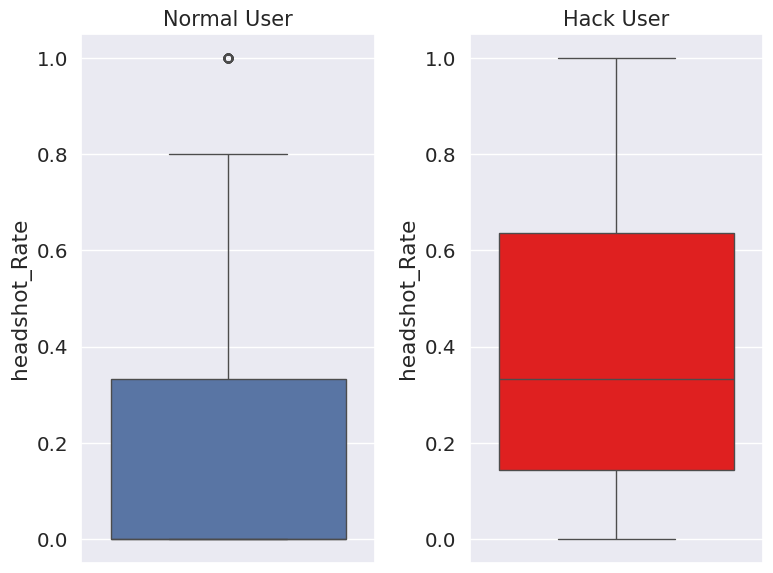

귀무가설을 기각하고, 대립가설을 채택! 유의미한 차이가 존재
U-검정 통계값: 455594.5, p-value: 0.0000


In [24]:
fig, axes = plt.subplots(1, 2, figsize=(8, 6))
sns.boxplot(normal_user_psm['headshot_Rate'], ax=axes[0])
axes[0].set_title('Normal User', fontsize=15)
sns.boxplot(hack_user_psm['headshot_Rate'], ax=axes[1], color='red')
axes[1].set_title('Hack User', fontsize=15)
plt.tight_layout()
plt.show()

# u 검정 확인
u_stat, p_value = mannwhitneyu(hack_user_psm['headshot_Rate'], normal_user_psm['headshot_Rate'], alternative='greater') # greater = 첫 번쨰 그룹의 값이 두 번쨰 그룹의 값보다 더 많다.

threshold = 0.05
if p_value < threshold:
    print('귀무가설을 기각하고, 대립가설을 채택! 유의미한 차이가 존재')
else:
    print('귀무가설을 채택. 두 그룹 간에 유의미한 차이가 존재하지 않다.')
print(f"U-검정 통계값: {u_stat}, p-value: {p_value:.4f}")

#### 검정 2.
- 가설2 : 핵 사용자들은 일반 사용자보다 무기 획득 수가 높다.(스피드 핵, 월핵 등 사용)

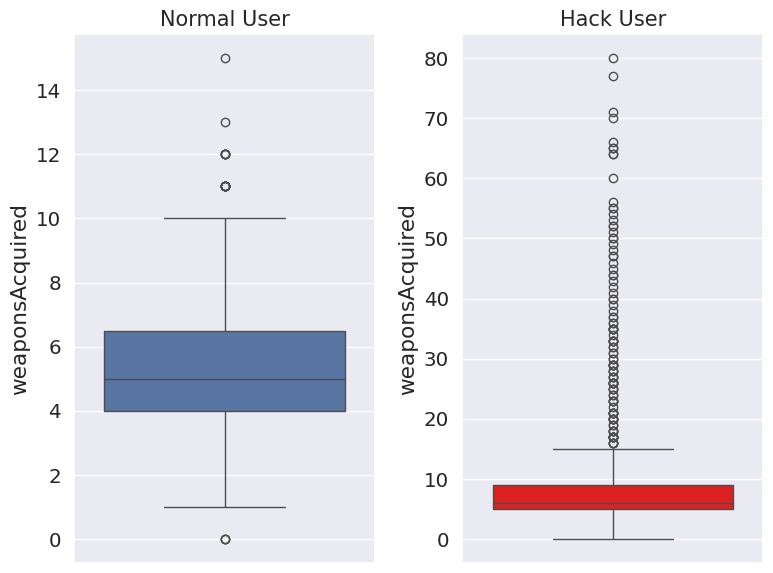

귀무가설을 기각하고, 대립가설을 채택! 유의미한 차이가 존재
U-검정 통계값: 403260.0, p-value: 0.0000


In [25]:
fig, axes = plt.subplots(1, 2, figsize=(8, 6))

sns.boxplot(normal_user_psm['weaponsAcquired'], ax=axes[0])
axes[0].set_title('Normal User', fontsize=15)
sns.boxplot(hack_user_psm['weaponsAcquired'], ax=axes[1], color='red')
axes[1].set_title('Hack User', fontsize=15)

plt.tight_layout()
plt.show()

# u 검정 확인
u_stat, p_value = mannwhitneyu(hack_user_psm['weaponsAcquired'], normal_user_psm['weaponsAcquired'], alternative='greater') # greater = 첫 번쨰 그룹의 값이 두 번쨰 그룹의 값보다 더 많다.

threshold = 0.05
if p_value < threshold:
    print('귀무가설을 기각하고, 대립가설을 채택! 유의미한 차이가 존재')
else:
    print('귀무가설을 채택. 두 그룹 간에 유의미한 차이가 존재하지 않다.')
print(f"U-검정 통계값: {u_stat}, p-value: {p_value:.4f}")

#### 검정 3.
- 가설3 : 핵 사용자들은 일반 사용자들보다 힐 아이템 사용이 적을 것이다.(자동회복 핵을 사용하기에)

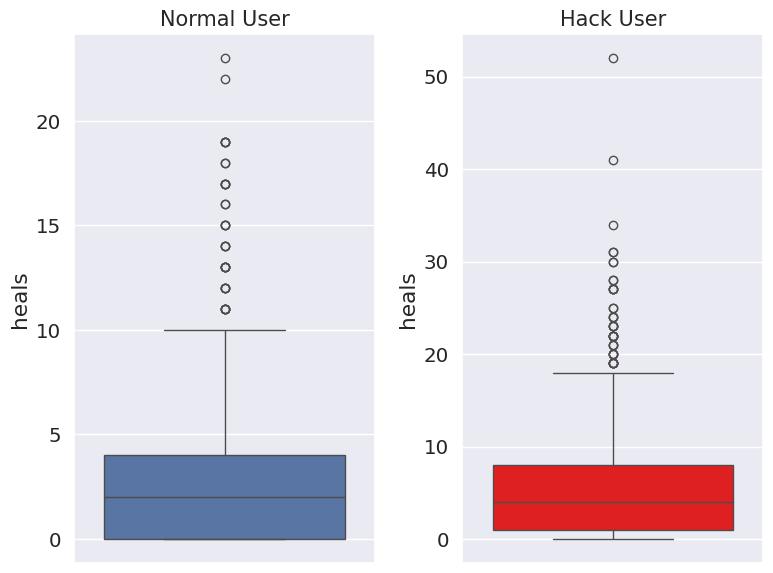

귀무가설을 채택. 두 그룹 간에 유의미한 차이가 존재하지 않다.
U-검정 통계값: 399989.0, p-value: 1.0000


In [26]:
fig, axes = plt.subplots(1, 2, figsize=(8, 6))

sns.boxplot(normal_user_psm['heals'], ax=axes[0])
axes[0].set_title('Normal User', fontsize=15)
sns.boxplot(hack_user_psm['heals'], ax=axes[1], color='red')
axes[1].set_title('Hack User', fontsize=15)

plt.tight_layout()
plt.show()

# u 검정 확인
u_stat, p_value = mannwhitneyu(hack_user_psm['heals'], normal_user_psm['heals'], alternative='less')

threshold = 0.05
if p_value < threshold:
    print('귀무가설을 기각하고, 대립가설을 채택! 유의미한 차이가 존재')
else:
    print('귀무가설을 채택. 두 그룹 간에 유의미한 차이가 존재하지 않다.')
print(f"U-검정 통계값: {u_stat}, p-value: {p_value:.4f}")

### 다른 변수 비교
- 이 비교에선 원본 데이터로 U검정 수행(성향 매칭 분석 외 기존 데이터프레임 비교)
- 연속 킬 수
- 총 이동거리

In [12]:
# 그룹별 boxplot 및 U검정
def U_test_boxplot(normal, hack, col):

    fig, axes = plt.subplots(1, 2, figsize=(8, 6))

    sns.boxplot(ax=axes[0], y=normal[col])
    axes[0].set_title('normal', fontsize=15)
    sns.boxplot(ax=axes[1], y=hack[col], color='orange')
    axes[1].set_title('hack', fontsize=15)
    plt.tight_layout()
    plt.show()

    # u 검정 확인
    u_stat, p_value = mannwhitneyu(hack_user[col], normal_user[col])

    threshold = 0.05
    if p_value < threshold:
        print('두 그룹 간에 유의미한 차이가 존재')
    else:
        print('두 그룹 간에 유의미한 차이가 존재하지 않음')
    print(f"U-검정 통계값: {u_stat}, p-value: {p_value:.4f}")
    print('-' * 60)
    print(f"일반 유저 평균 {col}: {normal[col].mean():.2f}")
    print(f"핵 유저 평균 {col}: {hack[col].mean():.2f}")

#### 연속 킬 수

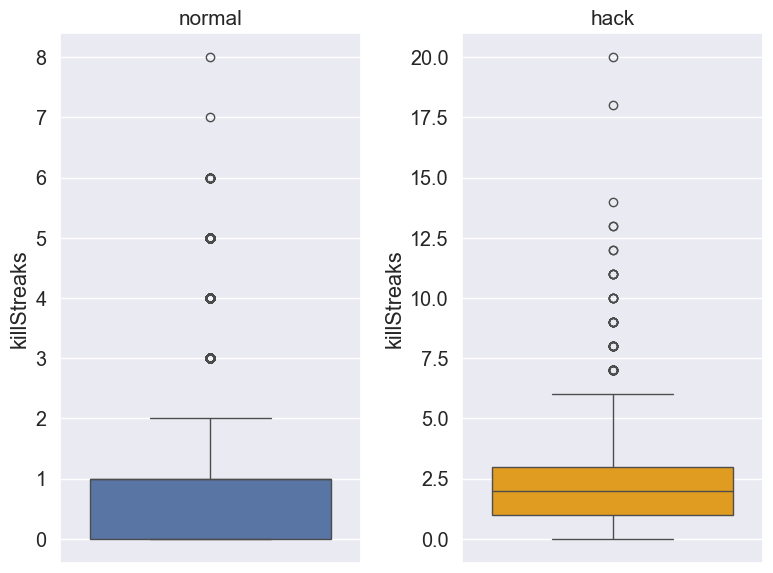

두 그룹 간에 유의미한 차이가 존재
U-검정 통계값: 2812106197.0, p-value: 0.0000
------------------------------------------------------------
일반 유저 평균 killStreaks: 0.92
핵 유저 평균 killStreaks: 2.37


In [13]:
U_test_boxplot(normal_user, hack_user, 'killStreaks')

#### 총 이동거리

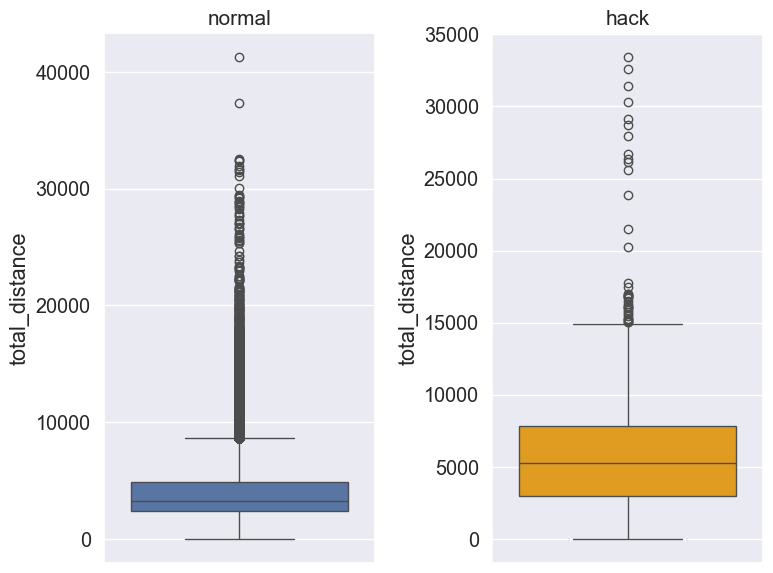

두 그룹 간에 유의미한 차이가 존재
U-검정 통계값: 2227510249.0, p-value: 0.0000
------------------------------------------------------------
일반 유저 평균 total_distance: 3863.57
핵 유저 평균 total_distance: 5526.26


In [14]:
U_test_boxplot(normal_user, hack_user, 'total_distance')

#### 상관관계 비교

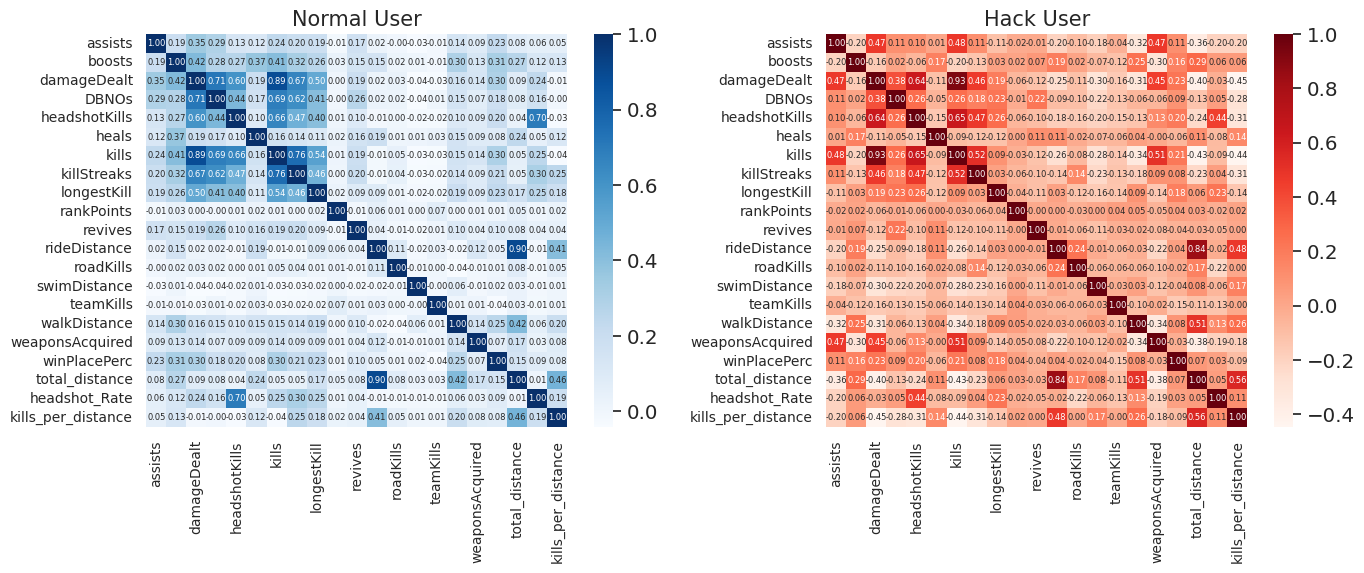

In [27]:
normal_user_corr = normal_user.select_dtypes(include=['number']).drop(columns=['True_label']).corr()
hack_user_corr = hack_user.select_dtypes(include=['number']).drop(columns=['True_label']).corr()

fig, axes = plt.subplots(1, 2, figsize=(14, 6))
sns.heatmap(normal_user_corr,  annot=True, fmt='.2f', cmap='Blues', annot_kws={"size": 6}, ax=axes[0])
axes[0].set_title('Normal User', fontsize=15)
axes[0].set_xticklabels(axes[0].get_xticklabels(), fontsize=10)
axes[0].set_yticklabels(axes[0].get_yticklabels(), fontsize=10)

sns.heatmap(hack_user_corr,  annot=True, fmt='.2f', cmap='Reds', annot_kws={"size": 6}, ax=axes[1])
axes[1].set_title('Hack User', fontsize=15)
axes[1].set_xticklabels(axes[1].get_xticklabels(), fontsize=10)
axes[1].set_yticklabels(axes[1].get_yticklabels(), fontsize=10)
plt.tight_layout()
plt.show()

### 결과
- U 검정 결과 두 그룹이 어느정도 잘 분리가 된걸로 나타난다.
- 이 검정 결과를 통해 모델을 사용해 라벨의 신빙성을 확인
- 이 라벨을 가지고 모델 학습 및 평가

----------------------------------------------------

## 이상탐지(Anomaly detection)
- 지도 학습 : XgBoosts

In [3]:
def Models_evaluation(y_true, y_pred, y_pred_proba=None):
    """모델 성능 평가 : 정확도, 정밀도, 재현율, F1-Score, ROC AUC """

    metrics = {}

    metrics['accuracy'] = accuracy_score(y_true, y_pred)  # 정확도
    metrics['precision'] = precision_score(y_true, y_pred) # 정밀도
    metrics['recall'] = recall_score(y_true, y_pred) # 재현율
    metrics['f1_score'] = f1_score(y_true, y_pred) # F1-Score

    # ROC AUC (확률값이 있는 경우만 계산)
    if y_pred_proba is not None:
        metrics['roc_auc'] = roc_auc_score(y_true, y_pred_proba)
    else:
        metrics['roc_auc'] = None

    for metric, value in metrics.items():
        if value is not None:
            print(f"{metric.capitalize()}: {value:.4f}")
        else:
            print(f"{metric.capitalize()}: Not Available")

    return metrics

### 지도학습
- XGBoost는 지도학습 모델로, 일반적으로 라벨이 있는 데이터를 기반으로 학습한다.
- 하지만 특정 상황에서는 정상 데이터만 학습하여 오차 기반으로 이상치를 탐지하는 방식으로 활용할 수도 있다.
[관련 논문](https://velog.io/@kyyle/%EB%A8%B8%EC%8B%A0%EB%9F%AC%EB%8B%9D-%EA%B8%B0%EB%B0%98-%EC%82%AC%EC%9A%A9%ED%9B%84%ED%95%B5%EC%97%B0%EB%A3%8C-%EC%95%88%EC%A0%84%EC%A0%95%EB%B3%B4-%EC%9D%B4%EC%83%81%EC%B9%98-%ED%83%90%EC%A7%80-XGBoost%EC%99%80-OCSVM%EC%9D%84-%EC%9D%B4%EC%9A%A9%ED%95%9C-%EC%84%B1%EB%8A%A5-%EB%B9%84%EA%B5%90)
- 본 프로젝트에서는 XGBoost를 지도학습 방식으로 활용하여, 라벨링된 데이터를 통해 핵 유저의 고유한 행동 패턴과 특징을 효과적으로 학습하도록 설계

In [4]:
"""
현재 핵 유저의 비율은 0.27%로 데이터 불균형이 심한 상태 
그래서 데이터 증강이나 가중치 등의 기법을 사용하지 않고 원래 비율로 실험 
"""

scaler = RobustScaler()
feature = scaler.fit_transform(final_df.select_dtypes(include=['number']).drop(columns={'True_label', 'rideDistance'}))
label = final_df['True_label']

# 데이터 분리
train_data, test_data, train_label, test_label = train_test_split(
    feature, label, test_size=0.2, random_state=42, stratify=label)

# XGBoost 모델
xgb_model = xgb.XGBClassifier(
    objective='binary:logistic',
    eval_metric='auc',
    max_depth=4,
    colsample_bytree=0.8,  # feature 사용 비율
    learning_rate=0.05,
    n_estimators=300,
    random_state=42,
    use_label_encoder=False)

xgb_model.fit(train_data, train_label) # 학습
test_pred = xgb_model.predict(test_data)  # 이진 예측 (0 또는 1)
test_pred_proba = xgb_model.predict_proba(test_data)[:, 1]  # 확률 값 (ROC AUC 계산에 필요)

# 성능 평가
metrics = Models_evaluation(test_label, test_pred, test_pred_proba)

Accuracy: 0.9981
Precision: 0.7695
Recall: 0.4049
F1_score: 0.5306
Roc_auc: 0.9970


In [6]:
"""
이번엔 스모트 기법 활용해 핵 유저의 데이터를 증강하는 기법으로 실험
XGBoost 모델은 가중치 옵션을 따로 지정하는 파라미터가 있지만
명확히 해석을 하기가 까다롭기 떄문에 정확한 비율로 조정 할 수 있는
스모트 기법을 사용
"""

scaler = RobustScaler()
feature = scaler.fit_transform(final_df.select_dtypes(include=['number']).drop(columns={'True_label', 'rideDistance'}))
label = final_df['True_label']

# SMOTE 적용 (핵 유저 비율을 2%로 증강)
smote = SMOTE(sampling_strategy=0.02, random_state=42) 
feature_resampled, label_resampled = smote.fit_resample(feature, label)

# 데이터 분리
train_data, test_data, train_label, test_label = train_test_split(
    feature_resampled, label_resampled, test_size=0.2, random_state=42, stratify=label_resampled)

# XGBoost 모델
xgb_model = xgb.XGBClassifier(
    objective='binary:logistic',
    eval_metric='auc',
    max_depth=4,
    colsample_bytree=0.8, # feature 사용 비율
    learning_rate=0.05,
    n_estimators=300,
    random_state=42,
    use_label_encoder=False)

xgb_model.fit(train_data, train_label) # 학습
test_pred = xgb_model.predict(test_data)  # 이진 예측 (0 또는 1)
test_pred_proba = xgb_model.predict_proba(test_data)[:, 1]  # 확률 값 (ROC AUC 계산에 필요)

# 성능 평가
metrics = Models_evaluation(test_label, test_pred, test_pred_proba)

Accuracy: 0.9975
Precision: 0.9683
Recall: 0.9018
F1_score: 0.9339
Roc_auc: 0.9996


# 회고

- 본 프로젝트에서는 다양한 모델(XGBoost, Autoencoder, Isolation Forest)을 활용하여 이상치를 탐지하고 핵 유저의 패턴을 분석
- 비지도 학습 및 준지도 학습 접근법을 통해 라벨 없는 데이터에서 이상치를 탐지하고, 라벨링한 데이터로 XGBoost를 활용해 핵 유저의 특성을 효과적으로 학습
- 하지만 핵 유저의 고유 패턴이 담긴 라벨이 없어서 모델이 이상치 값을 핵 유저로 판단하는 듯 하다.
- 프로젝트를 통해 핵 유저 탐지가 단순 이상치 탐지에서 끝나는 것이 아니라, 고유한 행동 패턴을 정량적으로 정의하고 이를 학습하는 과정이 중요함을 깨달았다.
- 향후에는 더 다양한 반지도 학습 모델을 적용하거나, 인과추론 기법을 통해 핵 유저의 행동 원인을 분석하는 방향으로 확장할 계획